In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('/Users/muratkahraman/Downloads/project/input/train.csv')

In [19]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.shape

(42000, 785)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel779,42000.0,0.002857,0.414264,0.0,0.0,0.0,0.0,62.0
pixel780,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel781,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'count')

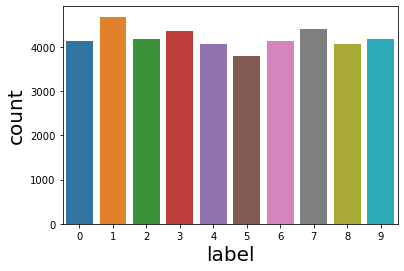

In [22]:
b = sns.countplot(x='label', data=df)  
b.set_xlabel("label", fontsize=20)  
b.set_ylabel("count", fontsize=20) 

In [23]:
import joblib
import pandas as pd
from sklearn import metrics
from sklearn import tree

def run(fold):
    #read the training data with folds
    df=pd.read_csv('/Users/muratkahraman/Downloads/project/input/train_folds.csv')

    #training data is where kfold is not equal to provided fold  
    # #also, note that we reset the index  
    df_train = df[df.kfold != fold].reset_index(drop=True) 

    #validation data is where kfold is equal to provided fold  
    df_valid = df[df.kfold == fold].reset_index(drop=True) 

    #drop the label column from dataframe and convert it to  
    # #a numpy array by using .values.  
    # #target is label column in the dataframe  
    x_train = df_train.drop("label", axis=1).values  
    y_train = df_train.label.values  
    
    #similarly, for validation, we have  
    x_valid = df_valid.drop("label", axis=1).values  
    y_valid = df_valid.label.values  
    
    #initialize simple decision tree classifier from sklearn  
    clf = tree.DecisionTreeClassifier()  
    
    #fit the model on training data  
    clf.fit(x_train, y_train)  
    
    #create predictions for validation samples  
    preds = clf.predict(x_valid) 

    #calculate & print accuracy  
    accuracy = metrics.accuracy_score(y_valid, preds)  
    print(f"Fold={fold}, Accuracy={accuracy}")  
    
    #save the model  
    joblib.dump(clf, f"/Users/muratkahraman/Downloads/project/models/dt_{fold}.bin") 
    
    if  __name__  ==  "__main__":  
        run(fold=0)  
        run(fold=1)  
        run(fold=2)  
        run(fold=3)  
        run(fold=4) 

In [24]:
run(fold=0)

Fold=0, Accuracy=0.8561904761904762
Fold=0, Accuracy=0.8547619047619047
Fold=0, Accuracy=0.8533333333333334
Fold=0, Accuracy=0.851547619047619
Fold=0, Accuracy=0.8560714285714286
Fold=0, Accuracy=0.853452380952381
Fold=0, Accuracy=0.8545238095238096
Fold=0, Accuracy=0.8525
Fold=0, Accuracy=0.8576190476190476
Fold=0, Accuracy=0.855
Fold=0, Accuracy=0.8563095238095239
Fold=0, Accuracy=0.8542857142857143


KeyboardInterrupt: 